Импортируем необходимые библиотеки.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

1. Загрузим в переменную data нужный датасет и посмотрим на него.

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


2. Проверим данные на пропуски.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пустых значений в данных нет. Однако, некоторые столбцы содержат вместо данных знак "?", что по сути представляет собой пропуск в данных.

In [ ]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

После изучения каждого столбца выяснил, что знак "?" содержится в столбцах: workclass (2799 строк), occupation (2809 строк), hours-per-week (857 строк).

Эти данные мы удалим. При этом считаю, что пропуски в столбцах "workclass" и "hours-per-week" можно было бы заменить модой. В нашем случае для столбца "workclass" это значение "Private" (служащие частных компаний) 70% респондентов относятся к этой категории сотрудников; а в случае столбца "hours-per-week" (количество рабочих часов в неделю) также можно было бы заменить модой, а именно 40 часовой рабочей неделей - 46% респондентов в датасете работают именно по такому графику.

По поводу пропусков по столбцу "профессия" ("occupation") не придумал, как можно заполнить данный столбец. Разве, что попробовать создать модель, которая бы предсказывала профессию по остальным признакам. Взять имеющиеся данные, обучить модель и посмотреть ее качество, если модель будет хорошо себя показывать - скормить ей данные, где пропущена профессия и таким образом заполнить данные. Единственный момент, не понимаю, насколько такой датасет потом будет пригоден для использования в других моделях.

3. Удаляем пропуски в данных.

In [ ]:
data.drop(data[data['workclass'] == '?'].index, inplace=True)
data.drop(data[data['occupation'] == '?'].index, inplace=True)
data.drop(data[data['hours-per-week'] == '?'].index, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   fnlwgt           46033 non-null  int64 
 3   education        46033 non-null  object
 4   educational-num  46033 non-null  int64 
 5   marital-status   46033 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     46033 non-null  object
 8   race             46033 non-null  object
 9   gender           46033 non-null  object
 10  capital-gain     46033 non-null  int64 
 11  capital-loss     46033 non-null  int64 
 12  hours-per-week   46033 non-null  int64 
 13  native-country   46033 non-null  object
 14  income           46033 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

После удаления пропусков количество строк в новом датафрейме уменьшилось на меньшую величину, чем сумма пропусков по трем столбцам. Это говорит о том, что во многих строках отсутствовали значения по нескольким столбцам сразу.

4. Построим несколько графиков.

Было любопытно посмотреть, как распределяется уровень дохода в зависимости от возраста, есть ли какой-то тренд, например, увеличивается ли с возрастом количество респондентов, получающих более 50К.

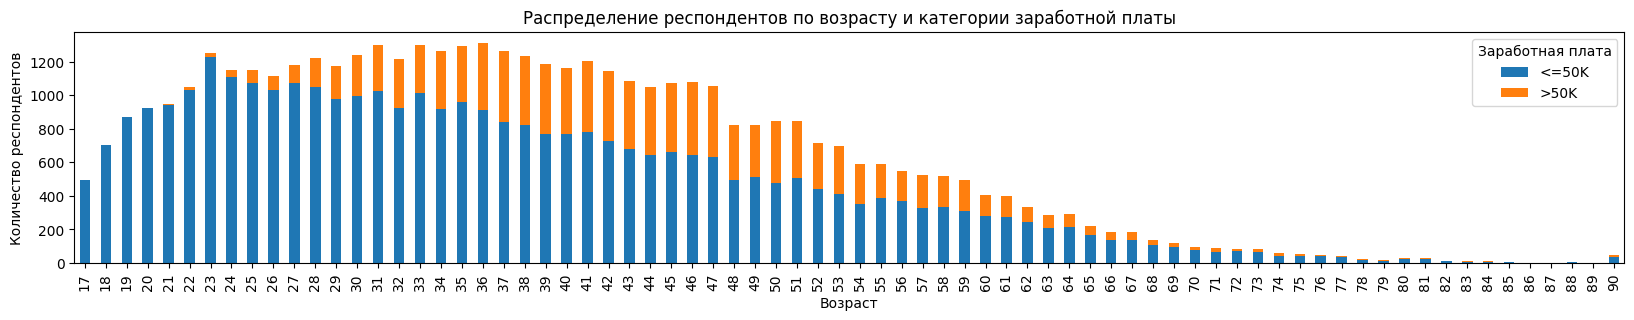

In [ ]:
# Группировка данных по возрасту и категории заработной платы
grouped_data = data.groupby(['age', 'income']).size().unstack()

# Построение графика
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Возраст')
plt.ylabel('Количество респондентов')
plt.title('Распределение респондентов по возрасту и категории заработной платы')
plt.legend(title='Заработная плата', loc='upper right')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

Также мне было интересно посмотреть, есть ли какая-то явная зависимость между возрастом и количеством рабочих часов в неделю, есть ли тендеция, что молодые люди работают большее количество часов.

Text(0.5, 1.0, 'Зависимость между количеством рабочих часов и возрастом респондентов')

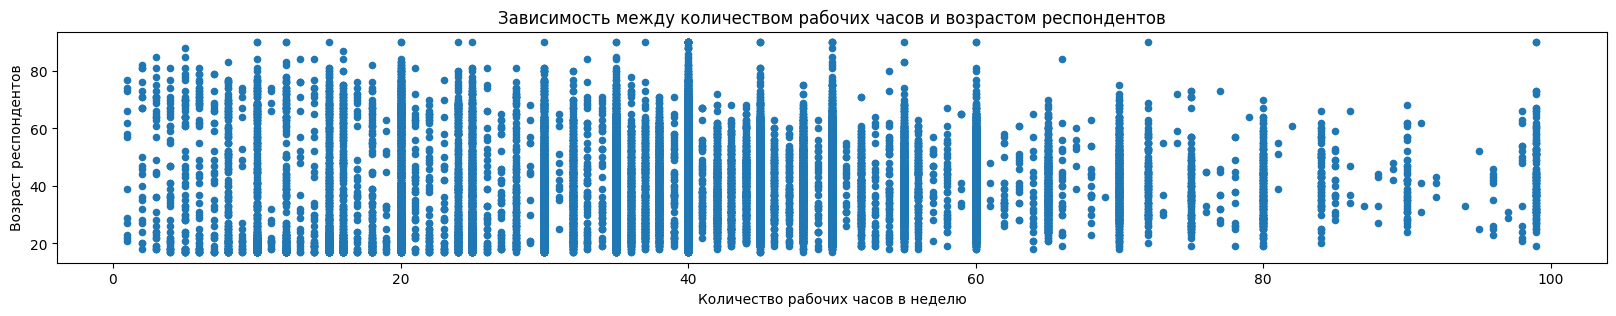

In [ ]:
data.plot.scatter(x = 'hours-per-week', y = 'age')
plt.xlabel('Количество рабочих часов в неделю')
plt.ylabel('Возраст респондентов')
plt.title('Зависимость между количеством рабочих часов и возрастом респондентов')

Выводы по графикам:
* по первому графику могу сказать, что начиная с 25-летнего возраста повышается распределение по уровню заработной платы, большее количество респондентов имеет уровень заработной платы более 50К;
* по второму графику не обнаружил никакой зависимости между возрастном и количеством отработанного времени в неделю.

5. Произведу погдготовку данных.

In [ ]:
from sklearn.linear_model import LogisticRegression

Для моделирования возьму следующие признаки: "age", "education, "occupation".

In [ ]:
selectedColumns = data[['age', 'workclass', 'education', 'occupation', 'capital-loss', 'capital-gain', 'gender', 'income']]

In [ ]:
selectedColumns.head()

,age,workclass,education,occupation,capital-loss,capital-gain,gender,income
0,25,Private,11th,Machine-op-inspct,0,0,Male,<=50K
1,38,Private,HS-grad,Farming-fishing,0,0,Male,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,0,0,Male,>50K
3,44,Private,Some-college,Machine-op-inspct,0,7688,Male,>50K
5,34,Private,10th,Other-service,0,0,Male,<=50K


Для моделирования необходимо преобрзовать категориальные переменные.

In [ ]:
X = pd.get_dummies(selectedColumns, columns=['workclass', 'education', 'occupation', 'gender'])

In [ ]:
del X['income']

In [ ]:
X.head()

,age,capital-loss,capital-gain,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,25,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,38,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,44,0,7688,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,34,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           46033 non-null  int64
 1   capital-loss                  46033 non-null  int64
 2   capital-gain                  46033 non-null  int64
 3   workclass_Federal-gov         46033 non-null  uint8
 4   workclass_Local-gov           46033 non-null  uint8
 5   workclass_Private             46033 non-null  uint8
 6   workclass_Self-emp-inc        46033 non-null  uint8
 7   workclass_Self-emp-not-inc    46033 non-null  uint8
 8   workclass_State-gov           46033 non-null  uint8
 9   workclass_Without-pay         46033 non-null  uint8
 10  education_10th                46033 non-null  uint8
 11  education_11th                46033 non-null  uint8
 12  education_12th                46033 non-null  uint8
 13  education_1st-4th             4

Целевую переменную (столбец "income") также необходимо преообразовать.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

Записываем в таргетную переменную y преобразованный столбец "income".

In [ ]:
y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

6. Обучение модели логистической регрессии.

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler # используем масштабирование данных
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

Резделю выборку на обучающее и тестовое подмножество.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучаем на части датасета (train).

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Посмотрим точность предсказания модели для тестовых данных.

In [ ]:
model.score(X_test,y_test)

0.8222004996198544

7. Обучение модели опорных векторов.

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_test, y_test)

0.826653633105246

# Выводы по проделанной работе.

1. В ходе выполнения работы мне удалось обучить модели и оценить их качество. Поскольку условиями задачи не указано, какого значения метрики score нам нужно было достигнуть трудно судить о том, насколько его значение получилось удовлетворительным или нет. Конечно хотелось бы получать значение score близкое к 100%.
2. При работе с данными я проверил наличие пропусков в датасете. Пустых значений в нем не оказалось, но были значения "?", что по сути является пропуском. Строки с данными значениями были удалены из данных. Альтернативные варианты работы с пропусками я указал в коде выше.
3. Точность двух моделей оказалась сопостовима, но скорость обучения в случае с логистической регрессией была много выше - пара секунд. При этом скорость обучения при использования модели опорных векторов была минута с небольшим.
4. В целом я считаю, что модели в полной мере справились со своей задачей. Повысить качество предсказания можно было бы за счет запонения пропусков в данных, вместо их удаления. Так же можно было бы взять все признаки, которые есть в датасете, и я так и сделал на самом деле. Но когда обучал модель, Google Colab завис - оперативной памяти не хватило.
Также получить более высокое качество наверное можно было бы добавив другие, новые признаки в датасет. При работе я пробовал разные варианты признаков, брал 3 признака, по итогу взял 7. Но score принципиально не менялся, значение лежало в диапазон от 0,78 до 0,82.
